In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

sns.set()
%config InLineBackend.figure_format = 'svg'

In [44]:
df=pd.read_csv(r"C:\csv data science\telecom_churn_sample.csv")
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


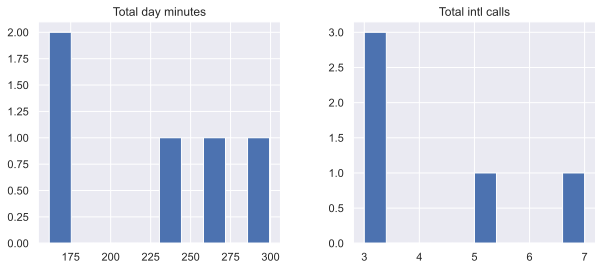

In [45]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

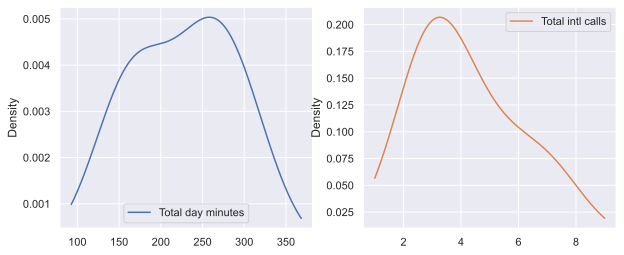

In [46]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

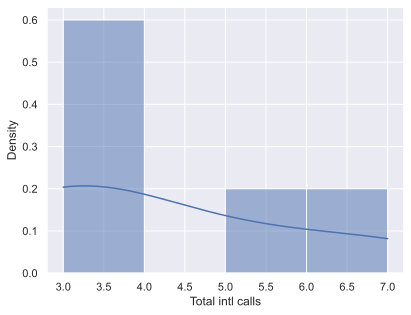

In [47]:
sns.histplot(df["Total intl calls"], kde=True, stat="density");

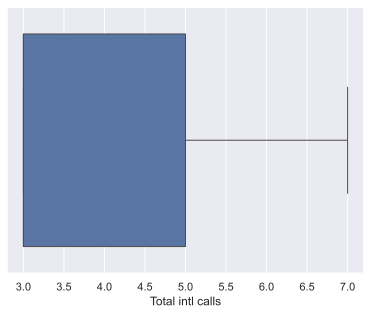

In [48]:
#Boxplot
sns.boxplot(x="Total intl calls", data=df);

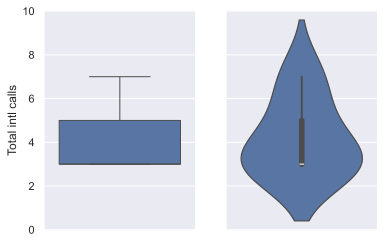

In [49]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

In [50]:
df[features].describe()


,Total day minutes,Total intl calls
count,5.000000,5.000000
mean,227.240000,4.200000
std,60.982153,1.788854
min,161.600000,3.000000
25%,166.700000,3.000000
50%,243.400000,3.000000
75%,265.100000,5.000000
max,299.400000,7.000000


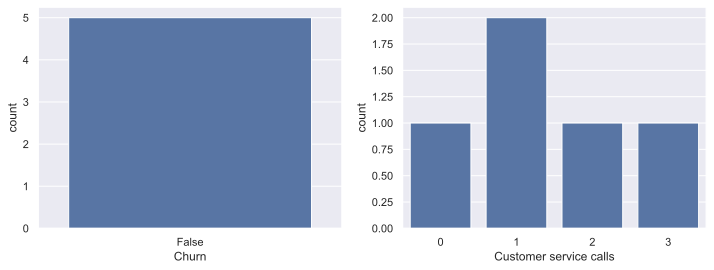

In [51]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

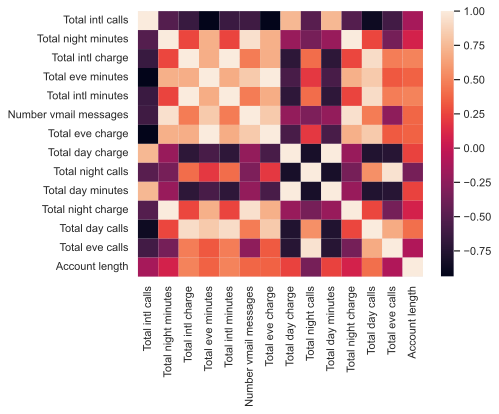

In [52]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

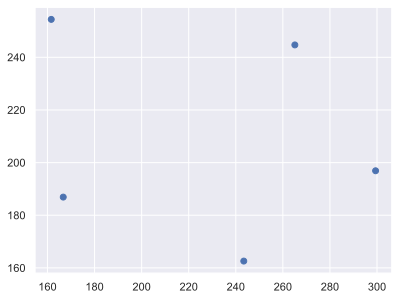

In [53]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

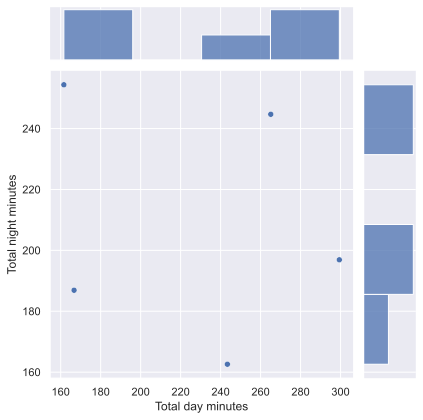

In [54]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

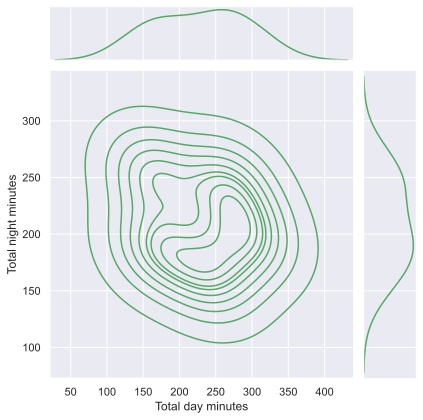

In [55]:
sns.jointplot(
    x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g"
);

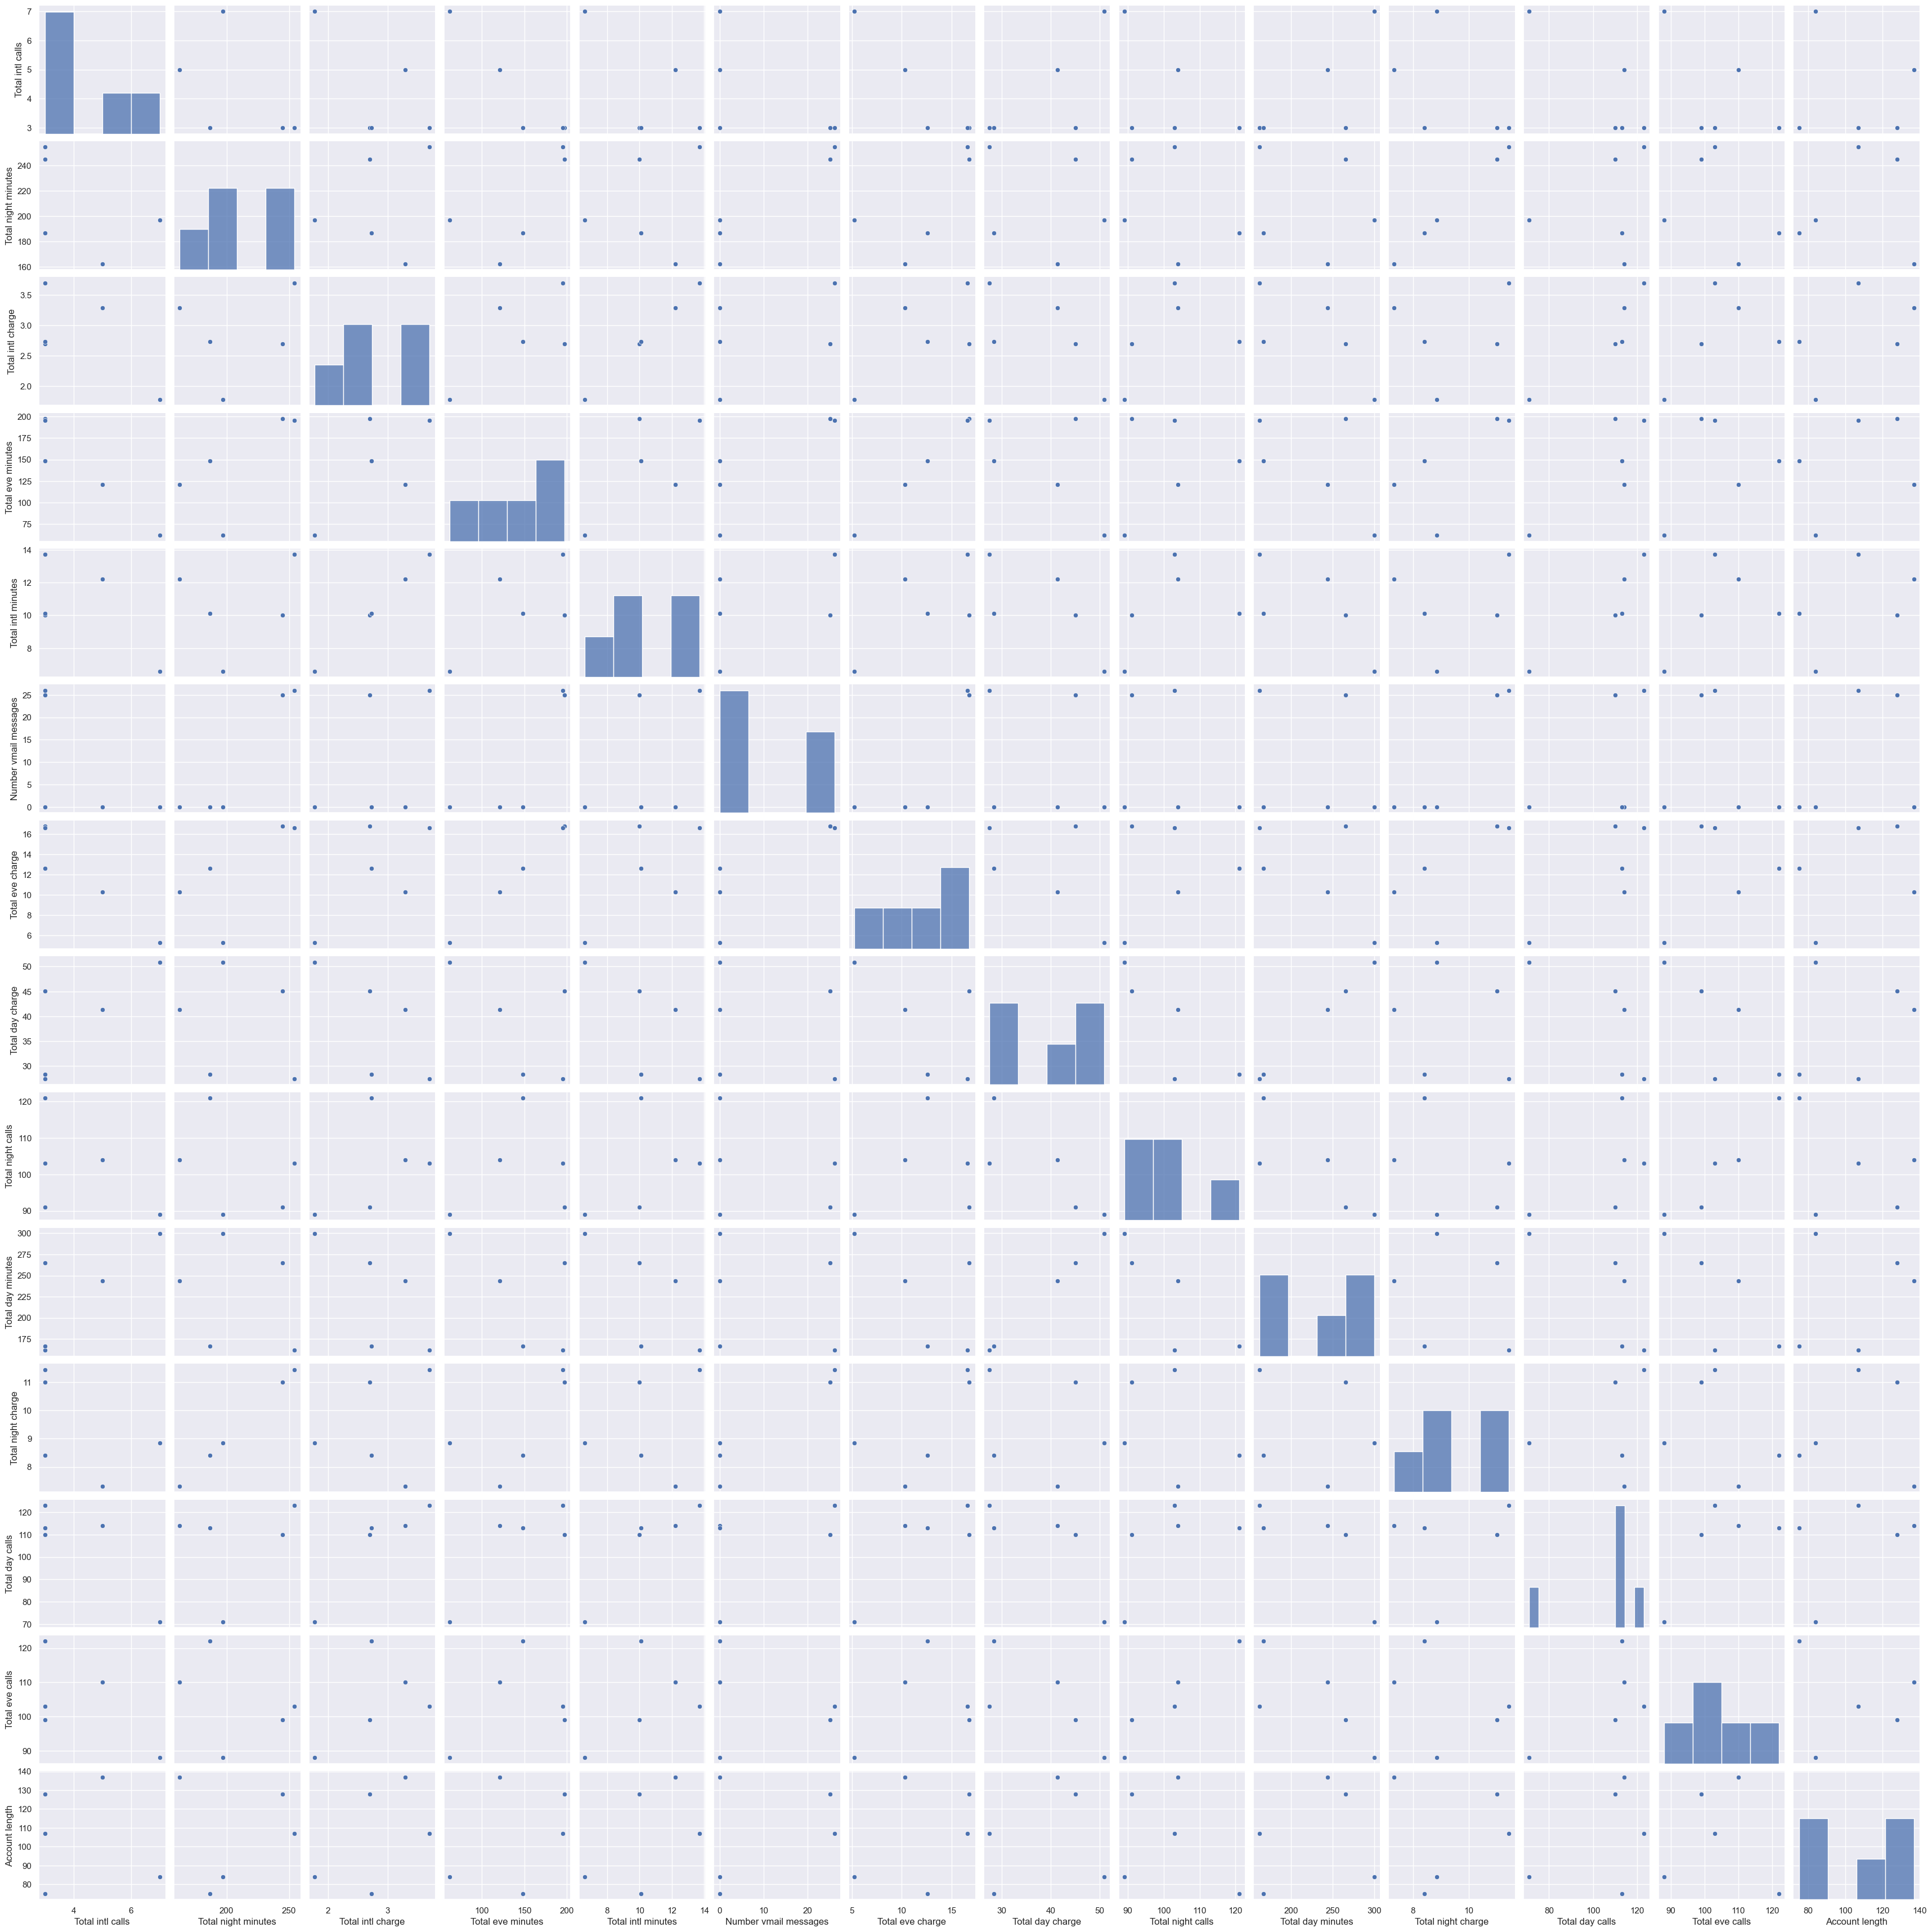

In [56]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

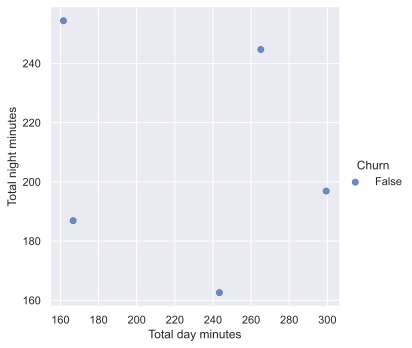

In [57]:
%config InlineBackend.figure_format = 'svg'
sns.lmplot(
    x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False
);

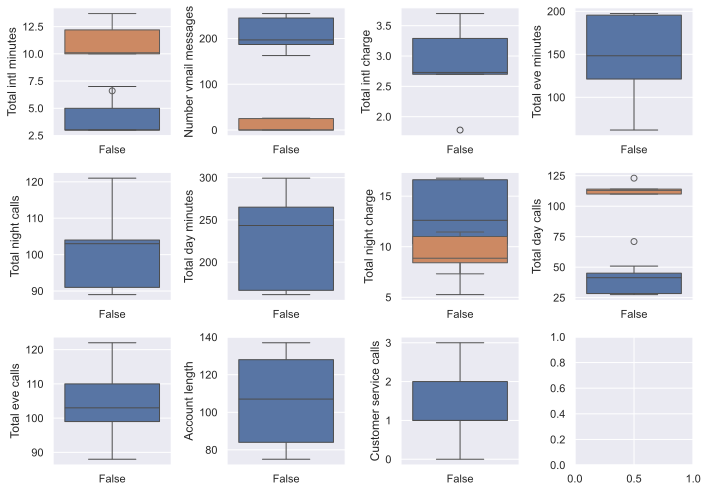

In [58]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 6), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

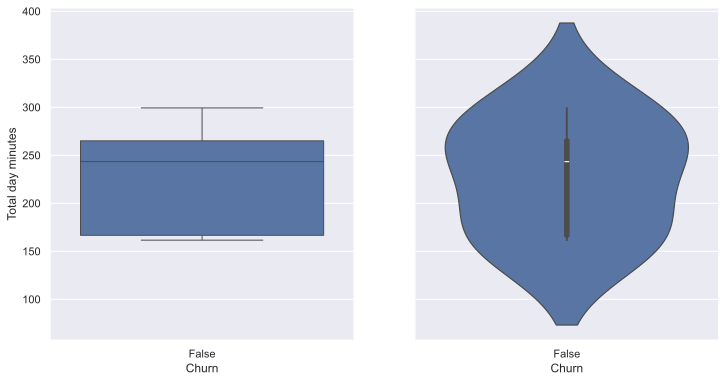

In [59]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

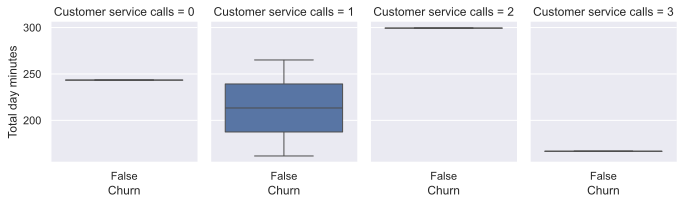

In [60]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);


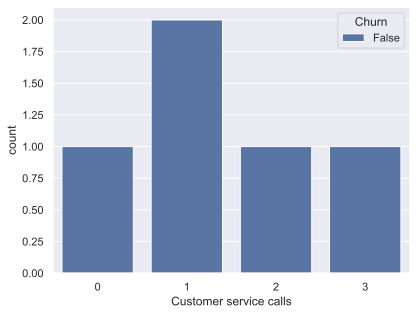

In [61]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

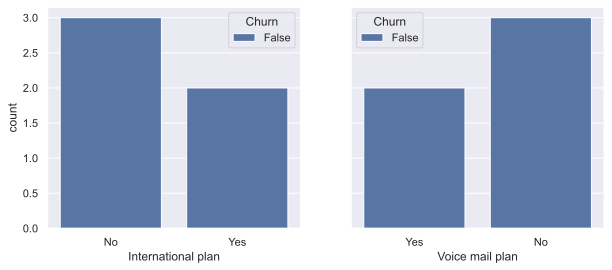

In [62]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

In [63]:
pd.crosstab(df["State"], df["Churn"]).T

State,KS,NJ,OH,OK
Churn,,,,
False,1,1,2,1


In [64]:
df.groupby(["State"])["Churn"].agg(["mean"]).sort_values(by="mean", ascending=False).T

State,KS,NJ,OH,OK
mean,0.0,0.0,0.0,0.0


In [70]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [72]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=2, random_state=17)  # Set perplexity < number of samples
tsne_repr = tsne.fit_transform(X_scaled)


ValueError: perplexity (30.0) must be less than n_samples (5)